# Задача 1. Разведочный анализ

* **Дедлайн**: 08.10.2023, 23:59
* **Основной полный балл**: 5
* **Максимум баллов**: 10

## Задача

- Самостоятельно скачать данные (из открытых источников по интересующей тематике, на сайте [kaggle](https://www.kaggle.com), [UCI](https://archive.ics.uci.edu/ml/datasets.php) репозитория, [Google Dataset Search](https://datasetsearch.research.google.com/) и др.). Для полного балла нужно выбрать данные, в которых есть пропущенные значения.
- Считать данные и вывести их основные характеристики, описание признаков.
- Сформулировать задачу предсказания, какой признак интересно было бы предсказывать по остальным.
- Произвести чистку данных (**Data Cleaning**). Например, заполнить пропущенные значения чем то осмысленным для поставленной задачи.
- Провести анализ признаков, используя визуализацию (**hist(), boxplot(), countplot(), barplot()** и тд), сделать выводы, которые могут быть полезны при дальнейшем решении задачи предсказания.
- Оценить зависимость между признаками (визуализация или построение матрицы корреляции).
- Выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные если это нужно), убрать ненужные признаки, создать новые (**Feature Engineering**).

## Описание датасета

Датасет https://www.kaggle.com/datasets/geothomas/playstore-dataset

Основные признаки:
* App Name - имя приложения
* App id - некоторый идентификатор приложения в Google Playstore
* Category - категория, к которой принадлежит приложение
* Rating - рейтинг приложения (значение от 0 до 5)
* Rating count - общее количество оценок приложения
* Installs - количество установок, может быть неточным
* Minimum installs - минимальное количество установок приложения
* Free - бесплатное приложение или нет
* Price - цена приложения (указана если приложение не бесплатное, иначе 0)
* Currency - валюта, в которой указана цена приложения (XXX если цена не указана)
* Size - размер приложения (в мегабайтах, может быть неизвестен, в таком случае Varies with device)
* Minimum Android - минимальная версия андройда для использования приложения
* Developer Id - уникальный идентификатор разработчика
* Developer Website - сайт разработчика
* Developer Email - почта разработчика
* Released - дата релиза приложения
* Last Update - дата последнего обновления
* Content Rating - возрастные ограничения на контент приложения
* Reviews - количество отзывов на приложение

Также есть некоторые другие признаки, но они показались нерелевантными.

Будем пытаться предсказать целевой признак **Rating** по остальным признакам

In [170]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('../input/playstore-dataset/Playstore_final.csv', on_bad_lines='skip')
df.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Free,Price,Currency,...,Ad Supported,In app purchases,Editor Choice,Summary,Reviews,Android version Text,Developer,Developer Address,Developer Internal ID,Version
0,Logistics Management,com.eniseistudio.logistics_management,Education,4.090909,66.0,"10,000+",10000.0,True,0.0,USD,...,True,False,False,Leading Online Learning and Training System in...,28.0,4.0 and up,eniseistudio,"7115 N Muscatel Ave San Gabriel, CA 91775 Unit...",4.656447e+18,1.1.5
1,Estados Unidos Noticias,com.eniseistudio.news.estados_unidos,News & Magazines,4.000000,8.0,"1,000+",1000.0,True,0.0,USD,...,True,False,False,Top Stories\r\nWorld\r\nEntertainment\r\nSport...,3.0,4.0 and up,eniseistudio,"7115 N Muscatel Ave San Gabriel, CA 91775 Unit...",4.656447e+18,1.2.3
2,Dental Assistant,com.eniseistudio.dental_assistant,Education,3.866667,15.0,"10,000+",10000.0,True,0.0,USD,...,True,False,False,"Dental Assistant: Study Dental Assistant, Dent...",3.0,4.0 and up,eniseistudio,"7115 N Muscatel Ave San Gabriel, CA 91775 Unit...",4.656447e+18,1.1.5
3,Medical Assistant,com.eniseistudio.course.medical_assistant,Education,4.000000,18.0,"5,000+",5000.0,True,0.0,USD,...,True,False,False,Medical Assistant Degree Medical Assistant Job...,7.0,4.0 and up,eniseistudio,"7115 N Muscatel Ave San Gabriel, CA 91775 Unit...",4.656447e+18,1.1.4
4,Business Administration,com.eniseistudio.majors.course.business_admini...,Education,4.023256,86.0,"50,000+",50000.0,True,0.0,USD,...,True,False,False,"Business Administration Learning, Business Adm...",29.0,4.0 and up,eniseistudio,"7115 N Muscatel Ave San Gabriel, CA 91775 Unit...",4.656447e+18,1.1.6


Проверим количество пропущенных значений в датасете

In [171]:
df.isnull().sum()

App Name                     13
App Id                        0
Category                     13
Rating                     2812
Rating Count             118768
Installs                     91
Minimum Installs             13
Free                         92
Price                        92
Currency                     92
Size                         28
Minimum Android            1082
Developer Id                 16
Developer Website        109726
Developer Email              26
Released                   3447
Last update                   0
Privacy Policy            50848
Content Rating               13
Ad Supported             169730
In app purchases              0
Editor Choice                 0
Summary                     201
Reviews                    2812
Android version Text       1082
Developer                    16
Developer Address        188792
Developer Internal ID        13
Version                     173
dtype: int64

Уберем лишние данные, которые сильно коррелируют (например, Developper Website и Developer Email) или не являются существенными для текущей задачи (например, Last Update)

In [172]:
df = df.drop(columns=["App Name", "Installs", "Currency", "Minimum Android", "Developer Website", 
         "Developer Email", "Released", "Last update", "Privacy Policy", "Ad Supported",
         "In app purchases", "Editor Choice", "Summary", "Android version Text",
         "Developer", "Developer Address", "Developer Internal ID", "Version"])

Посмотрим сколько пустых ячеек осталось в оставшихся столбцах

In [173]:
df.isnull().sum()

App Id                   0
Category                13
Rating                2812
Rating Count        118768
Minimum Installs        13
Free                    92
Price                   92
Size                    28
Developer Id            16
Content Rating          13
Reviews               2812
dtype: int64

Уберем все строки в которых мы не знаем количество установок, так как хочется оценить рейтинг относительно их количества

In [174]:
df = df.drop(df[pd.isnull(df['Minimum Installs'])].index)
df.isnull().sum()

App Id                   0
Category                 0
Rating                2799
Rating Count        118755
Minimum Installs         0
Free                    79
Price                   79
Size                    15
Developer Id             3
Content Rating           0
Reviews               2799
dtype: int64

Для одного приложения не известна цена, удалим его из выборки. Также для 3 приложений неизвестен разработчик, их уберем тоже

In [175]:
df = df.drop(df[pd.isnull(df['Price'])].index)
df = df.drop(df[pd.isnull(df['Developer Id'])].index)
df.isnull().sum()

App Id                   0
Category                 0
Rating                2720
Rating Count        118675
Minimum Installs         0
Free                     0
Price                    0
Size                    14
Developer Id             0
Content Rating           0
Reviews               2720
dtype: int64

Так как в этом наборе данных и так есть приложения с неизвестным размером, заполним для всех таких приложений поле Size единообразно, строчкой Varies with device

In [176]:
df.loc[pd.isnull(df['Size']), 'Size'] = "Varies with device"
df.isnull().sum()

App Id                   0
Category                 0
Rating                2720
Rating Count        118675
Minimum Installs         0
Free                     0
Price                    0
Size                     0
Developer Id             0
Content Rating           0
Reviews               2720
dtype: int64

Также уберем все приложения со слишком маленьким количеством установок, так как по ним имеется слишком мало статиски, чтобы оценивать рейтинг

In [177]:
df = df.drop(df[df['Minimum Installs'] < 100].index)
df.isnull().sum()

App Id                  0
Category                0
Rating               2083
Rating Count        70062
Minimum Installs        0
Free                    0
Price                   0
Size                    0
Developer Id            0
Content Rating          0
Reviews              2083
dtype: int64

## Заполнение пропущеных данных в полях Reviews, Size, Rating Count и Rating

### Заполнение пропущенных данных в поле Reviews

Для заполнения пропущенных данных относительно количества отзывов, попробуем оценить, как зависит количество оценок от количества установок.

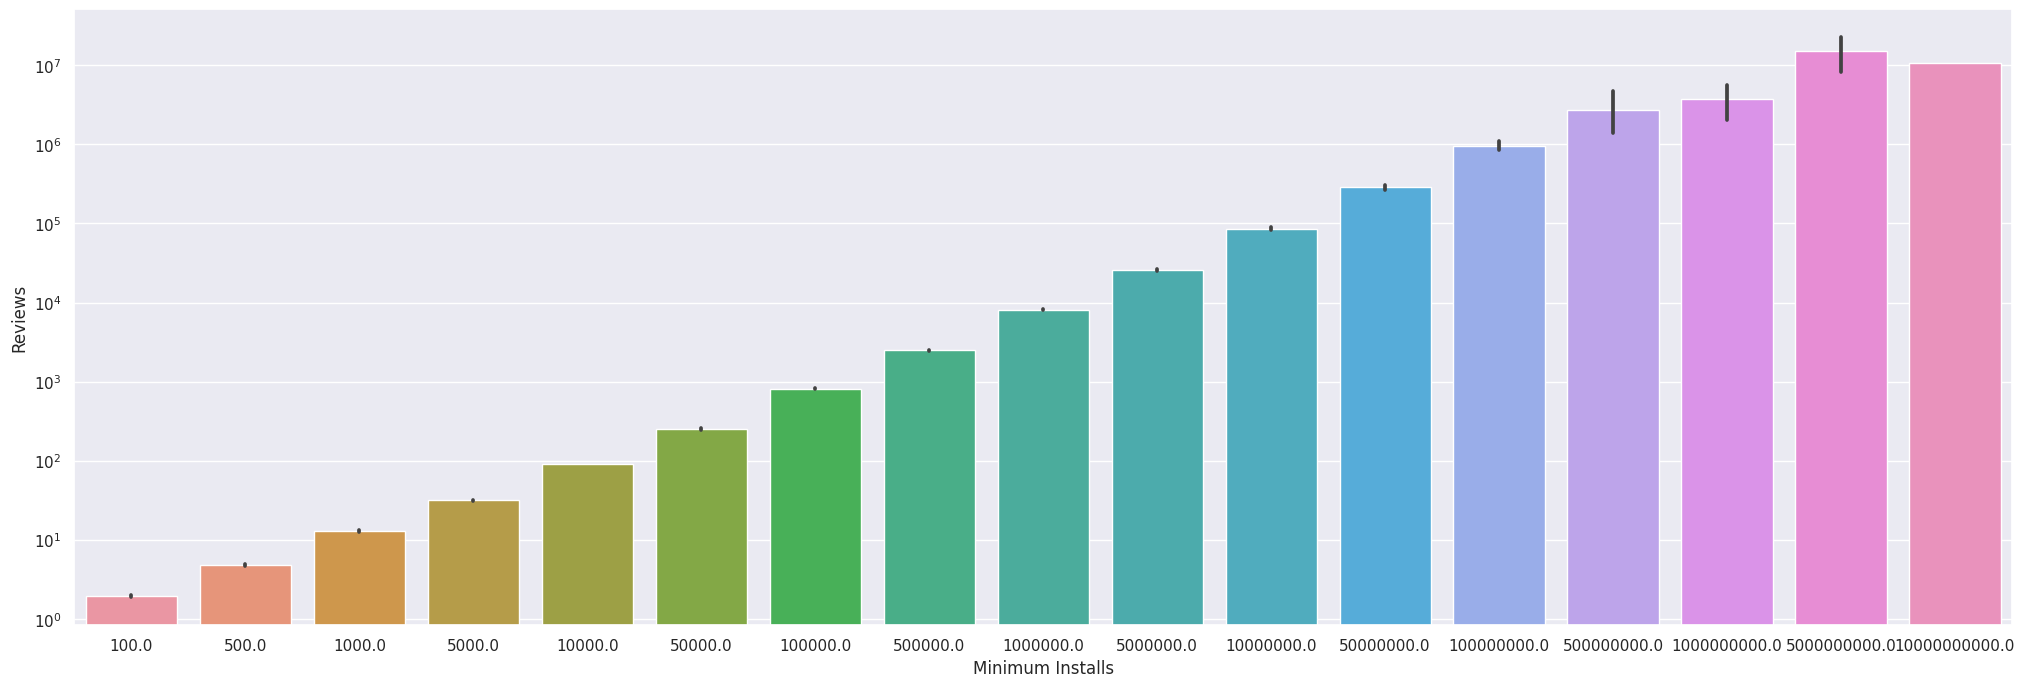

In [178]:
sns.barplot(x='Minimum Installs', y='Reviews', data=df);
plt.yscale('log')

Невооруженным взглядом видно, что количество отзывов сильно коррелирует с общим количеством установок приложения, как и ожидалось. Так как все приложения по количеству установок у нас разбиты на классы относительно того, соклько их минимально раз установили, можно принять для каждого приложения с отсутствующим количеством отзывов среднее количество отзывов в его классе как значение данного поля.

In [179]:
for value in pd.unique(df['Minimum Installs'].values):
    review_count = df.loc[df['Minimum Installs'] == value, 'Reviews'].mean()
    df.loc[(df['Minimum Installs'] == value) & (pd.isnull(df['Reviews'])), 'Reviews'] = review_count

In [180]:
df.isnull().sum()

App Id                  0
Category                0
Rating               2083
Rating Count        70062
Minimum Installs        0
Free                    0
Price                   0
Size                    0
Developer Id            0
Content Rating          0
Reviews                 0
dtype: int64

### Заполнение пропущенных данных в поле Size

Сначала, суфикс M (мегабайты), k (килобайты) и G (гигабайты) после размеров у приложений, для которых размер известен. Переведем все в килобайты.

In [182]:
df["Size"].value_counts()

Size
Varies with device    20216
11M                    9860
12M                    9074
13M                    8262
14M                    7566
                      ...  
470M                      1
6.3k                      1
328M                      1
344M                      1
6.8k                      1
Name: count, Length: 1522, dtype: int64

In [183]:
def row_mutator(row):
    if row["Size"] == "Varies with device":
        return row
    
    if row["Size"][-1] == 'k':
        row["Size"] = float(row["Size"][:-1].replace(",", "."))
    elif row["Size"][-1] == 'M':
        row["Size"] = float(row["Size"][:-1].replace(",", ".")) * 1024
    elif row["Size"][-1] == 'G':
        row["Size"] = float(row["Size"][:-1].replace(",", ".")) * 1024 * 1024
    
    return row

df = df.apply(row_mutator, axis=1, result_type='broadcast')

In [185]:
df.loc[df["Size"] == "Varies with device", "Size"] = None
df.isnull().sum()

App Id                  0
Category                0
Rating               2083
Rating Count        70062
Minimum Installs        0
Free                    0
Price                   0
Size                20216
Developer Id            0
Content Rating          0
Reviews                 0
dtype: int64

Оценим зависимость размера приложения от его категории

<Axes: xlabel='Category', ylabel='Size'>

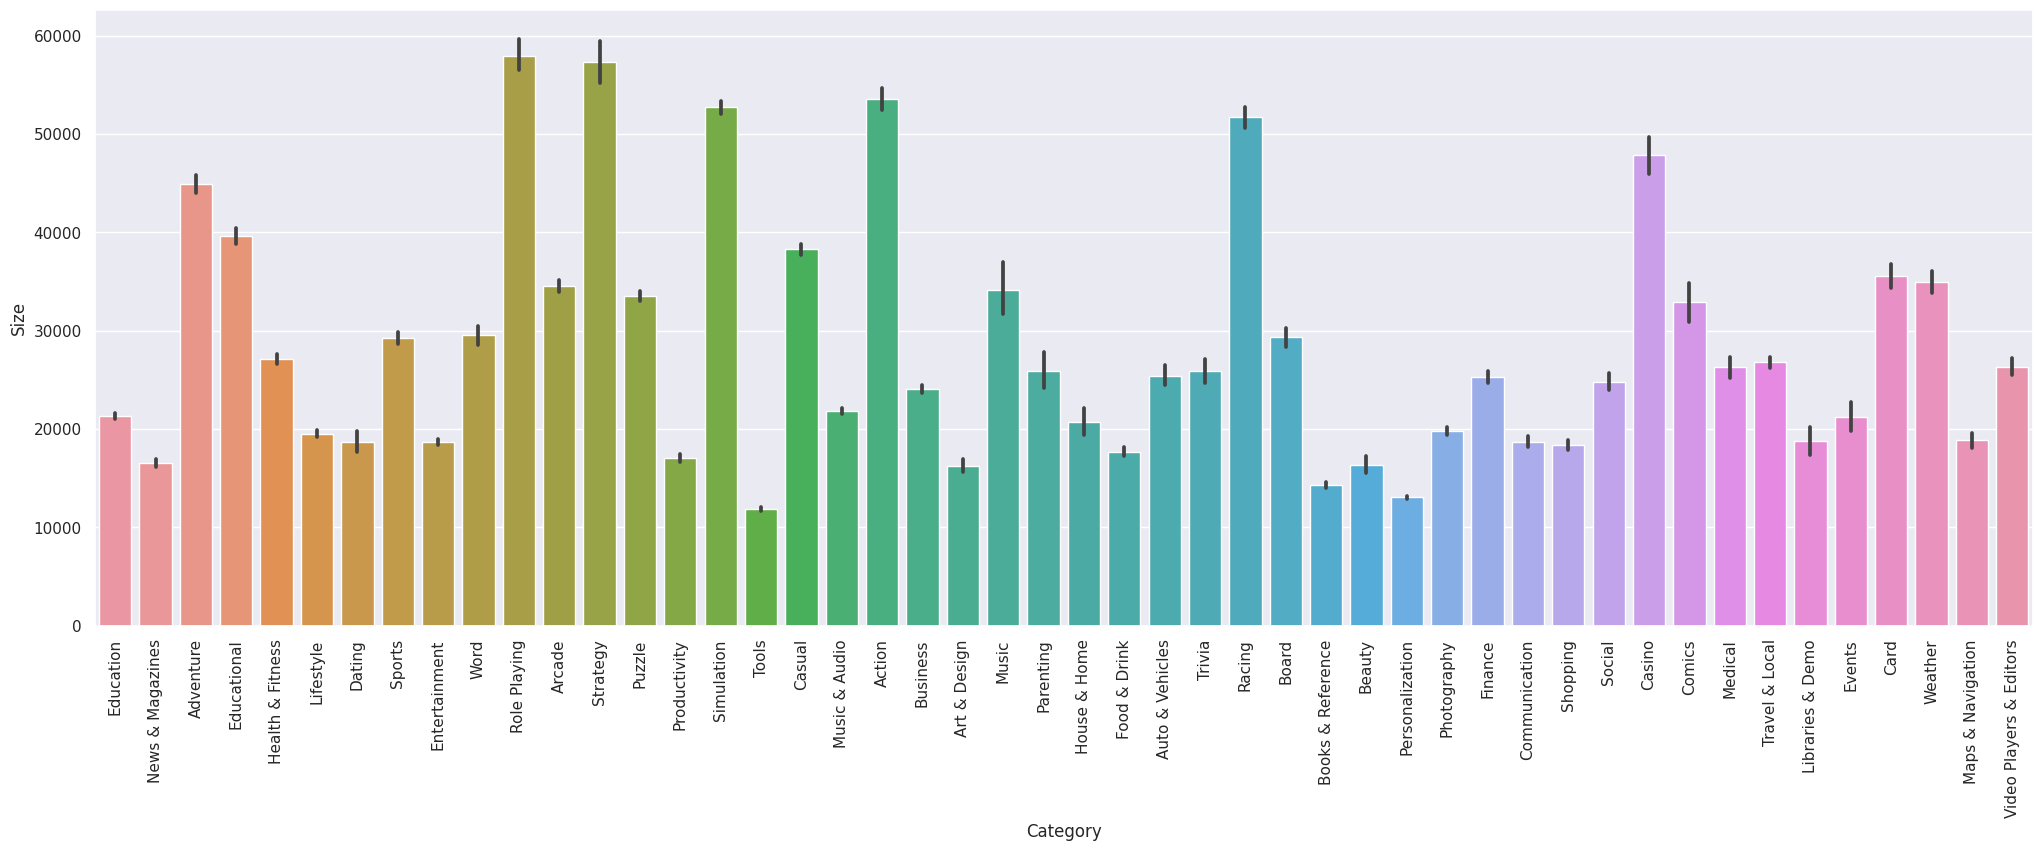

In [189]:
df["Size"] = pd.to_numeric(df["Size"])
size_plot = sns.barplot(x='Category', y='Size', data=df);
plt.xticks(rotation=90)
size_plot

Как можно судить по стандартному отклонению, для большинства категорий заменить неизвестный размер средним по категории выглядит разумным решением.

In [187]:
for category in pd.unique(df['Category'].values):
    mean_size = df.loc[df['Category'] == category, 'Size'].mean()
    df.loc[(df['Category'] == category) & (pd.isnull(df['Size'])), 'Size'] = mean_size
df.isnull().sum()

App Id                  0
Category                0
Rating               2083
Rating Count        70062
Minimum Installs        0
Free                    0
Price                   0
Size                    0
Developer Id            0
Content Rating          0
Reviews                 0
dtype: int64

### Заполнение пропущенных Rating и Rating count

Попробуем с помощью кореляционной матрицы оценить, от каких параметров сильнее всего зависит Rating и Rating count. Для этого переведем категориальные строковые признаки в числовые.

In [206]:
df["Category"] = pd.Categorical(df["Category"])
df['Category_code'] = df["Category"].cat.codes
df["Content Rating"] = pd.Categorical(df["Content Rating"])
df['Content_Rating_code'] = df["Content Rating"].cat.codes
df["Size"] = pd.to_numeric(df["Size"])
df["Rating"] = pd.to_numeric(df["Rating"])
df["Rating Count"] = pd.to_numeric(df["Rating Count"])
df["Minimum Installs"] = pd.to_numeric(df["Minimum Installs"])

In [198]:
df.head()

,App Id,Category,Rating,Rating Count,Minimum Installs,Free,Price,Size,Developer Id,Content Rating,Reviews,Category_code,Content_Rating_code
0,com.eniseistudio.logistics_management,Education,4.090909,66.0,10000.0,True,0.0,5939.2,4656446977926344285,Everyone,28.0,15,1
1,com.eniseistudio.news.estados_unidos,News & Magazines,4.0,8.0,1000.0,True,0.0,5427.2,4656446977926344285,Everyone,3.0,29,1
2,com.eniseistudio.dental_assistant,Education,3.866667,15.0,10000.0,True,0.0,5836.8,4656446977926344285,Everyone,3.0,15,1
3,com.eniseistudio.course.medical_assistant,Education,4.0,18.0,5000.0,True,0.0,5939.2,4656446977926344285,Everyone,7.0,15,1
4,com.eniseistudio.majors.course.business_admini...,Education,4.023256,86.0,50000.0,True,0.0,5836.8,4656446977926344285,Everyone,29.0,15,1


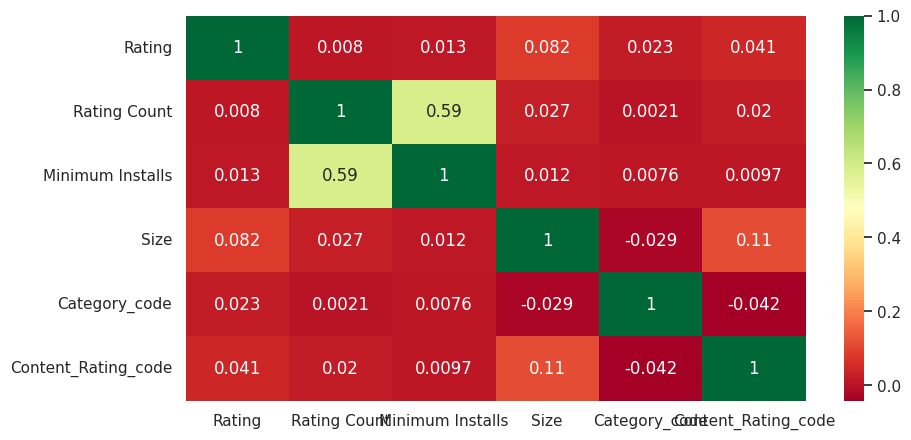

In [207]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='RdYlGn')
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

Ожидаемо, количество оценок хорошо корелирует с количеством установок, а значит можно попробовать грубо оценить количество оценок аналогично количеству отзывов с помощью классов, на которые у нас разбиты приложения относительно количества установок.

In [208]:
for value in pd.unique(df['Minimum Installs'].values):
    rating_count = df.loc[df['Minimum Installs'] == value, 'Rating Count'].mean()
    df.loc[(df['Minimum Installs'] == value) & (pd.isnull(df['Rating Count'])), 'Rating Count'] = rating_count
df.isnull().sum()

App Id                    0
Category                  0
Rating                 2083
Rating Count              0
Minimum Installs          0
Free                      0
Price                     0
Size                      0
Developer Id              0
Content Rating            0
Reviews                   0
Category_code             0
Content_Rating_code       0
dtype: int64

In [210]:
df.shape[0]

399477

Как можно увидеть, размер всей таблицы с данными примерно 400000 записей, и так как, судя по кореляционной матрице, Rating слабо зависит от каждого признака по отдельности. Таким образом, просто избавимся от 2000 записей, для которых рейтинг неизвестен, так как 2000 записей это немного относительно общего количества в 400000.

In [211]:
df = df.drop(df[pd.isnull(df['Rating'])].index)
df.isnull().sum()

App Id                 0
Category               0
Rating                 0
Rating Count           0
Minimum Installs       0
Free                   0
Price                  0
Size                   0
Developer Id           0
Content Rating         0
Reviews                0
Category_code          0
Content_Rating_code    0
dtype: int64